# Lab3: split-apply-combine in pandas & data visualization

Question:

Do Netflix subscribers prefer older or newer movies? Are there other factors that affect this preference such as *rating*?

Task:

- Split the dataset into groups, one for each year, and then to compute one or several summary statistics.
- See whether this statistic increases over the years.


Source: https://github.com/datacamp/community-groupby

## Data Exploration with pandas

### Import your data

In [22]:
# Import packages and set visualization style
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as no
sns.set()
%matplotlib notebook

In [23]:
# Import data and check out head of DataFrame
df = pd.read_csv('netflix.csv')
df.head()

,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


### Data Exploratory Analysis

Applying `pandas` DataFrame `.info()` below shows that you have 1000 rows and 7 columns of data, but also that the column of interest, `user_rating_score`, has only 605 non-null values. This means that there are 395 missing values:

In [24]:
# Check out info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
title                1000 non-null object
rating               1000 non-null object
ratinglevel          941 non-null object
ratingdescription    1000 non-null int64
release_year         1000 non-null int64
user_rating_score    605 non-null float64
user_rating_size     1000 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


### Dispersion Matrix plot

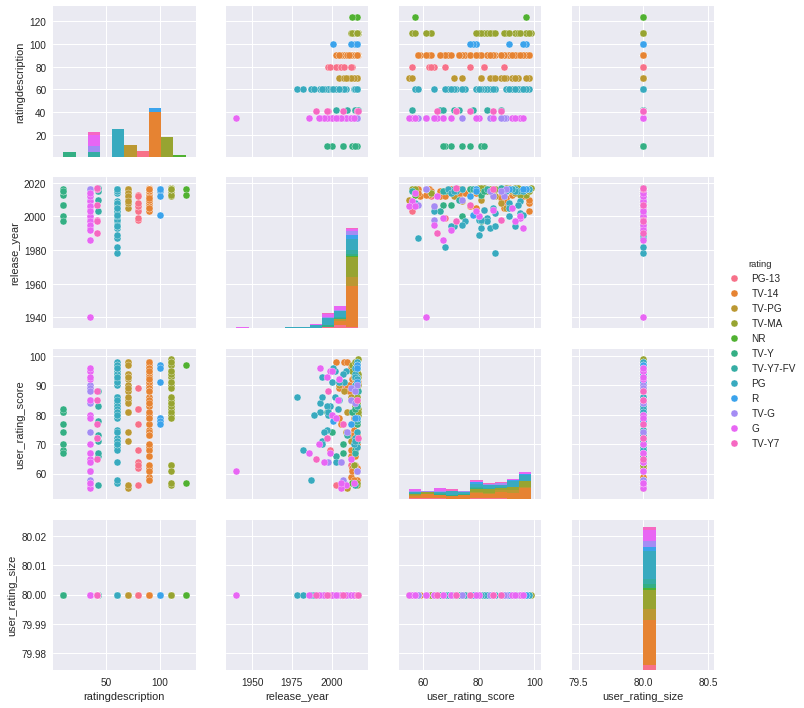

In [4]:
# Drop rows with missing values and drop duplicate
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Visualize pairplot of df (similar to pairs() in R)
sns.pairplot(df, hue='rating');

In [4]:
sns.pairplot?

In [25]:
# Get summary stats of df
df.describe()

,ratingdescription,release_year,user_rating_score,user_rating_size
count,1000.00000,1000.000000,605.000000,1000.000000
mean,67.36600,2010.335000,84.094215,80.783000
std,30.78561,8.877927,12.344371,0.973066
min,10.00000,1940.000000,55.000000,80.000000
25%,35.00000,2007.000000,75.000000,80.000000
50%,60.00000,2015.000000,88.000000,80.000000
75%,90.00000,2016.000000,95.000000,82.000000
max,124.00000,2017.000000,99.000000,82.000000


## Groupby (split-apply-combine) to answer the question

<a id='step_1'></a>

Let us first use a *groupby* method to split the data into groups, where each group is the set of movies released in a given year. 

In [26]:
# Group by year
df_by_year = df.groupby('release_year')

This creates a *groupby* object:

In [27]:
# Check type of GroupBy object
type(df_by_year)

pandas.core.groupby.DataFrameGroupBy

Let us compute summary statistics of our response variable `user_rating_score` in order to capture the main characteristics for each value of `release_year`.

In [28]:
(df.groupby('release_year')
    .describe())

ratingdescription  user_rating_score  user_rating_size
release_year                                                              
1940         count           3.000000           3.000000          3.000000
             mean           35.000000          61.000000         80.000000
             std             0.000000           0.000000          0.000000
             min            35.000000          61.000000         80.000000
             25%            35.000000          61.000000         80.000000
             50%            35.000000          61.000000         80.000000
             75%            35.000000          61.000000         80.000000
             max            35.000000          61.000000         80.000000
1976         count           4.000000           0.000000          4.000000
             mean           35.000000                NaN         82.000000
             std             0.000000                NaN          0.000000
             min            35.000000                NaN         82.000000
             25%            35.000000                NaN         82.000000
             50%            35.000000                NaN         82.000000
             75%            35.000000                NaN         82.000000
             max            35.000000                NaN         82.000000
1978         count           2.000000           2.000000          2.000000
             mean           60.000000          86.000000         80.000000
             std             0.000000           0.000000          0.000000
             min            60.000000          86.000000         80.000000
             25%            60.000000          86.000000         80.000000
             50%            60.000000          86.000000         80.000000
             75%            60.000000          86.000000         80.000000
             max            60.000000          86.000000         80.000000
1982         count           6.000000           3.000000          6.000000
             mean           47.500000          68.000000         81.000000
             std            13.693064           0.000000          1.095445
             min            35.000000          68.000000         80.000000
             25%            35.000000          68.000000         80.000000
             50%            47.500000          68.000000         81.000000
...                               ...                ...               ...
2014         std            27.486036          13.338781          1.006332
             min            10.000000          57.000000         80.000000
             25%            41.000000          70.000000         80.000000
             50%            70.000000          79.000000         82.000000
             75%            90.000000          93.000000         82.000000
             max           124.000000          94.000000         82.000000
2015         count         109.000000          66.000000        109.000000
             mean           63.146789          84.500000         80.788991
             std            32.620383          11.113748          0.981999
             min            10.000000          56.000000         80.000000
             25%            41.000000          79.000000         80.000000
             50%            60.000000          84.500000         80.000000
             75%            90.000000          94.000000         82.000000
             max           110.000000          98.000000         82.000000
2016         count         292.000000         200.000000        292.000000
             mean           80.462329          86.835000         80.606164
             std            27.430549          12.117423          0.907602
             min            10.000000          56.000000         80.000000
             25%            60.000000          80.000000         80.000000
             50%            90.000000          92.000000         80.000000
             75%           100.000000        

We can depict the above information using a boxplot as follows:

<IPython.core.display.Javascript object>


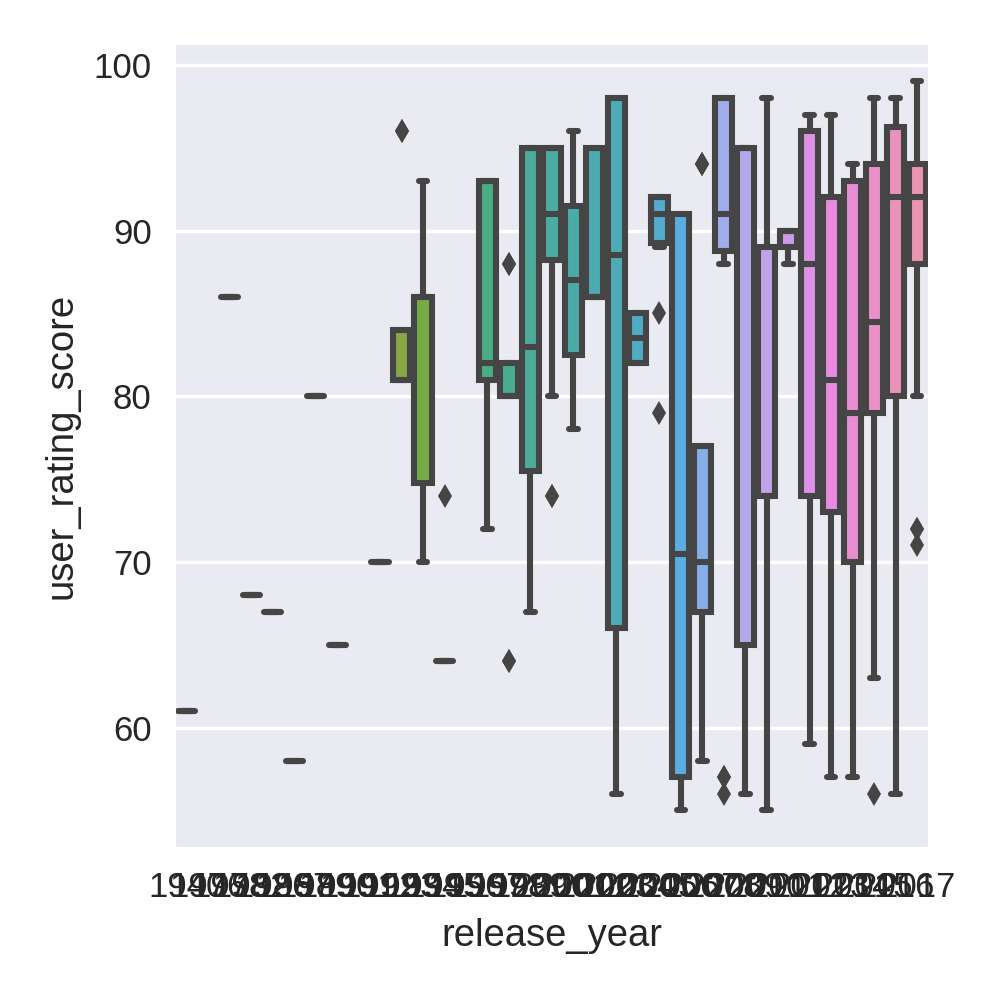

In [79]:
# Create boxplot  via factor plot
sns.factorplot(x="release_year", y="user_rating_score",data=df, kind="box")

Let's obtain a summary statistic, such as the mean and the compare agains the exmplanatory variables `release_year` and `rating`.

In [29]:
(df.groupby(['release_year','rating'])
   .median())

ratingdescription  user_rating_score  user_rating_size
release_year rating                                                          
1940         G                        35               61.0                80
1976         G                        35                NaN                82
1978         PG                       60               86.0                80
1982         G                        35                NaN                82
             PG                       60               68.0                80
1986         G                        35               67.0                80
1987         PG                       60               58.0                80
1989         PG                       60               80.0                80
             TV-Y7                    41                NaN                82
1990         G                        35                NaN                82
             TV-Y7                    41               65.0                80
1991         G                        35                NaN                82
1992         G                        35               70.0                80
1993         G                        35               96.0                82
             PG                       60               81.0                80
             TV-Y                     10                NaN                82
1994         PG                       60               86.0                80
1995         G                        35               64.0                80
             PG                       60               74.0                80
1996         TV-Y7-FV                 42                NaN                82
1997         G                        35               93.0                82
             PG                       60               83.0                80
             TV-Y                     10               81.0                80
             TV-Y7                    41               72.0                80
             TV-Y7-FV                 42                NaN                82
1998         G                        35                NaN                82
             PG                       60               80.0                80
             PG-13                    80               82.0                80
             TV-G                     35               64.0                80
             TV-Y7                    41               88.0                80
...                                  ...                ...               ...
2014         TV-Y                     10                NaN                82
             TV-Y7                    41                NaN                82
             TV-Y7-FV                 42                NaN                82
2015         G                        35                NaN                82
             PG                       60               93.0                80
             R                       100               79.0                81
             TV-14                    90               83.0                80
             TV-G                     35               84.0                80
             TV-MA                   110               98.0                80
             TV-PG                    70               92.0                80
             TV-Y                     10               68.0                82
             TV-Y7                    41                NaN                82
             TV-Y7-FV                 42               61.5                81
2016         G                        35               80.0                82
             NR                      124               97.0                82
             PG                       60               96.0                80
             R                       100               93.5                80
             TV-14                    90               91.0                80
             TV-G                     35     

In [36]:
df_median = (df.groupby(['release_year','rating'])
               .apply(lambda x:x.user_rating_score.median())) # behaves similar to summarise()
df_median.head() 

dtype('float64')

In [40]:
# To apply an arbitrary function the lambda function should return a new series
df1 = (df.groupby(['release_year','rating'])
               .apply(lambda x:pd.Series({'median_score':x.user_rating_score.median()})))
df1.head()

median_score
release_year rating              
1940         G               61.0
1976         G                NaN
1978         PG              86.0
1982         G                NaN
             PG              68.0

## Chaining in pandas (aka piping in dplyr)

- Method chaining means to call methods on an object one after another -- it is very popular in data science.

- Suppose we now want to compute an arbitrary funciton (e.g., the IQR) and the median along all possible values of `release_year` and `rating` for which the number of observations is positive.

In [80]:
# To apply an arbitrary function the lambda function should return a new series
df2 = (df.groupby(['release_year','rating']) # combine step
               .apply(lambda x:pd.Series({'n':x.user_rating_score.count(),
                                          'q2':x.user_rating_score.median(),
                                          'q1':x.user_rating_score.quantile(0.25),
                                          'q3':x.user_rating_score.quantile(0.75)}))
               .query('n>0') # similar to filter() in dplyr
               .assign(IQR_score=lambda x: x.q3-x.q1)) # similar to mutate() in dplyr
df2

,,n,q1,q2,q3,IQR_score
release_year,rating,,,,,
1940,G,3.0,61.00,61.0,61.00,0.00
1978,PG,2.0,86.00,86.0,86.00,0.00
1982,PG,3.0,68.00,68.0,68.00,0.00
1986,G,4.0,67.00,67.0,67.00,0.00
1987,PG,2.0,58.00,58.0,58.00,0.00
1989,PG,1.0,80.00,80.0,80.00,0.00
1990,TV-Y7,4.0,65.00,65.0,65.00,0.00
1992,G,2.0,70.00,70.0,70.00,0.00
1993,G,2.0,96.00,96.0,96.00,0.00


## From wide to long format

- We now want to create a line plot `user_rating_score` against `release_year`of the median along with inter-quartile range (i.e., plotting q3 and q1) but identifying each line according to `rating`. 
- To do so, it is more convenient to convert our previous DataFrame object from wide to long format.

In [74]:
df3 = pd.melt(df2.reset_index(), # notice that we have to add reset index
              col_level=0,
              id_vars=['release_year','rating'],
              value_vars=['median_score','q1','q3'],
              value_name='SummaryStatistic')
df3.head()

,release_year,rating,variable,SummaryStatistic
0,1940,G,median_score,61.0
1,1978,PG,median_score,86.0
2,1982,PG,median_score,68.0
3,1986,G,median_score,67.0
4,1987,PG,median_score,58.0
